<a href="https://colab.research.google.com/github/kage08/Samay/blob/main/example/colab/LPTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install samay-0.1.0-cp311-cp311-linux_x86_64.whl

Processing ./samay-0.1.0-cp311-cp311-linux_x86_64.whl
  Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
samay is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Using cached numpy-2.1.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.3
    Uninstalling numpy-2.2.3:
      Successfully uninstalled numpy-2.2.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.1.3 which is incompatible.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.1.3 which is incompat

In [1]:
!pip install --upgrade -U numpy --force

  Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gluonts 0.16.0 requires numpy<2.2,>=1.16, but you have numpy 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
thinc 8.2.5 requires numpy<2.0.0,>=1.19.0; python_version >= "3.9", but you have numpy 2.2.3 which is incompatible.
pytensor 2.27.1 requires numpy<2,>=1.17.0, but you have numpy 2.2.3 which is incompatible.
langchain 0.3.18 requires numpy<2,>=1.26.4; python_version < "3.12", but you have numpy 2.2

In [3]:
from samay.model import LPTMModel


config = {
    "task_name": "forecasting",
    "forecast_horizon": 192,
    "head_dropout": 0.1,
    "weight_decay": 0,
    "freeze_encoder": True,  # Freeze the patch embedding layer
    "freeze_embedder": True,  # Freeze the transformer encoder
    "freeze_head": False,  # The linear forecasting head must be trained
}
model = LPTMModel(config)

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/951 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

In [4]:
!wget https://raw.githubusercontent.com/kage08/Samay/refs/heads/main/data/data/ETTh1.csv

--2025-02-17 21:49:24--  https://raw.githubusercontent.com/kage08/Samay/refs/heads/main/data/data/ETTh1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2589657 (2.5M) [text/plain]
Saving to: ‘ETTh1.csv’

ETTh1.csv           100%[===================>]   2.47M  --.-KB/s    in 0.06s   

2025-02-17 21:49:24 (42.6 MB/s) - ‘ETTh1.csv’ saved [2589657/2589657]



In [5]:
from samay.dataset import LPTMDataset

train_dataset = LPTMDataset(
    name="ett",
    datetime_col="date",
    path="./ETTh1.csv",
    mode="train",
    horizon=192,
)

finetuned_model = model.finetune(train_dataset)

/usr/local/lib/python3.11/dist-packages/torch/utils/checkpoint.py:87: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


Epoch 0: Train loss: 0.618
Epoch 1: Train loss: 0.540
Epoch 2: Train loss: 0.518
Epoch 3: Train loss: 0.507
Epoch 4: Train loss: 0.498


In [7]:
val_dataset = LPTMDataset(
    name="ett",
    datetime_col="date",
    path="./ETTh1.csv",
    mode="train",
    horizon=192,
)
avg_loss, trues, preds, histories = model.evaluate(val_dataset, task_name="forecasting")
avg_loss

np.float64(0.4714480135284486)

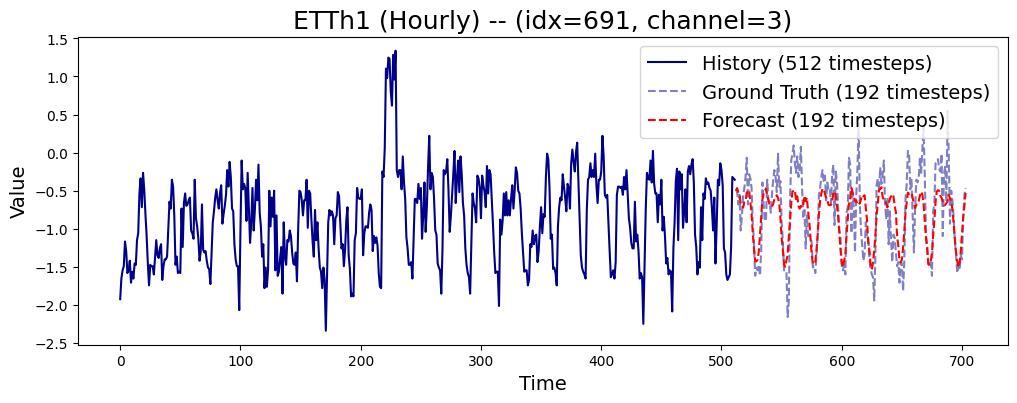

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Pick a random channel and time index
trues = np.array(trues)
preds = np.array(preds)
histories = np.array(histories)
channel_idx = np.random.randint(0, 7)
time_index = np.random.randint(0, trues.shape[0])

history = histories[time_index, channel_idx, :]
true = trues[time_index, channel_idx, :]
pred = preds[time_index, channel_idx, :]

plt.figure(figsize=(12, 4))

# Plotting the first time series from history
plt.plot(range(len(history)), history, label="History (512 timesteps)", c="darkblue")

# Plotting ground truth and prediction
num_forecasts = len(true)

offset = len(history)
plt.plot(
    range(offset, offset + len(true)),
    true,
    label="Ground Truth (192 timesteps)",
    color="darkblue",
    linestyle="--",
    alpha=0.5,
)
plt.plot(
    range(offset, offset + len(pred)),
    pred,
    label="Forecast (192 timesteps)",
    color="red",
    linestyle="--",
)

plt.title(f"ETTh1 (Hourly) -- (idx={time_index}, channel={channel_idx})", fontsize=18)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.legend(fontsize=14)
plt.show()